In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, Video
from base64 import b64encode
import os

# Linear Regression & Gradient Descent
This notebook is meant to explore linear regressions and explore how to best fit a line to some data points. This notebook follows Chapter 2 of the Understanding Deep Learning book by Simon J.D. Prince.

First, let's define some training data points, and a linear function.

In [2]:
# Prepare 3 data points
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

# Define a linear function and x data just for the line
x_line = np.arange(0, 10, 0.1)

# Linear function
def f(x, phi0=0, phi1=1):
    return phi0 + phi1 * x

Now, let's set up a plot object and plot the data and linear function.

In [3]:
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-')

    plt.show()

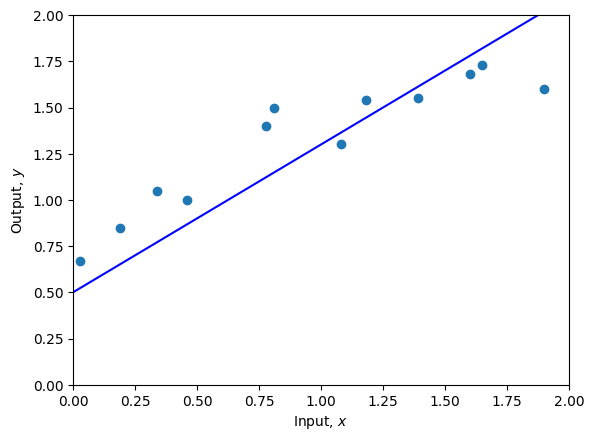

In [4]:
# Set an arbitrary value for the phi parameters
phi0 = 0.5; phi1 = 0.8

# Plot the data and the model predictions
plot(x,y,phi0,phi1)

We use the least squares method for calculating the loss. For each data point the vertical distance between each y-value and the linear function is calculated, which is then squared. This is repeated for the other data points and added together.

<div style="text-align:left;width:250px;">
$$
\begin{align*}
L[\phi] & =\sum_{i=1}^{I}\left(\mathrm{f}\left[x_{i}, \phi\right]-y_{i}\right)^{2} \\
& =\sum_{i=1}^{I}\left(\phi_{0}+\phi_{1} x_{i}-y_{i}\right)^{2} \\
\end{align*}
$$
</div>

In [5]:
# Evaluate initial loss
def loss(x,y,phi0,phi1):
    return np.sum((f(x, phi0, phi1) - y)**2)

print(f"Initial loss, and params: {loss(x,y,phi0,phi1):.3f} [{phi0:.3f},{phi1:.3f}]")

Initial loss, and params: 0.567 [0.500,0.800]


The gradients of the loss function with respect to $\large \phi_0$ and $\large \phi_1$ are:

$\large \frac{\partial L}{\partial \phi_0} = 2 \left(\phi_0 + \phi_1 x_i - y_i\right)$

$\large \frac{\partial L}{\partial \phi_1} = 2 \sum\limits_{i=1}^I \left(\phi_0 + \phi_1 x_i - y_i\right) x_i$

We can use these to calculate the numerical gradients for $\frac{\partial L}{\partial \phi_0}$ and $\frac{\partial L}{\partial \phi_1}$

In [6]:
# Calculate gradients
def grad(x,y,phi0,phi1):
    d_phi0 = 2 * np.sum(phi0 + phi1 * x - y)
    d_phi1 = 2 * np.sum((phi0 + phi1 * x - y) * x)
    return d_phi0, d_phi1

dphi0, dphi1 = grad(x,y,phi0,phi1)
print(f"Gradients: dphi0={dphi0:.3f}, dphi1={dphi1:.3f}")

Gradients: dphi0=-1.484, dphi1=0.902


In [7]:
# 1 training iteration, update the weights
lr = 0.1
phi1 -= lr * dphi1
phi0 -= lr * dphi0

In [8]:
# loss is down! yay!
loss1 = (((x * phi1 + phi0) - y)**2).sum()
print(f"Updated loss, and params: {loss(x,y,phi0,phi1):.3f} [{phi0:.3f},{phi1:.3f}]")

Updated loss, and params: 0.346 [0.648,0.710]


We can plot the updated model and training data.

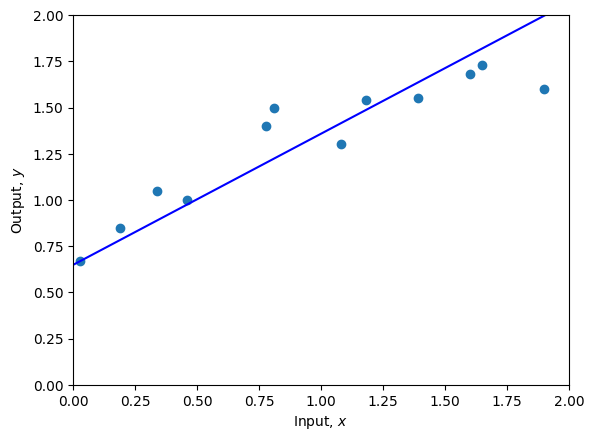

In [9]:
# Plot the data and the updated model predictions
plot(x,y,phi0,phi1)

Because we have set quite a high learning rate we can see the model is a better fit to the training data already!

## Training Loop

Let's try with a smaller learning rate and train the model over multiple epochs.

In [10]:
# Set initial values
lr = 0.01
epochs = 100
phi0 = 0.5; phi1 = 0.8

Epoch 0: Loss = 0.567, phi0 = 0.500, phi1 = 0.800
Epoch 10: Loss = 0.362, phi0 = 0.612, phi1 = 0.710
Epoch 20: Loss = 0.272, phi0 = 0.683, phi1 = 0.647
Epoch 30: Loss = 0.232, phi0 = 0.731, phi1 = 0.605
Epoch 40: Loss = 0.214, phi0 = 0.763, phi1 = 0.578
Epoch 50: Loss = 0.206, phi0 = 0.784, phi1 = 0.559
Epoch 60: Loss = 0.203, phi0 = 0.798, phi1 = 0.547
Epoch 70: Loss = 0.201, phi0 = 0.807, phi1 = 0.539
Epoch 80: Loss = 0.200, phi0 = 0.814, phi1 = 0.533
Epoch 90: Loss = 0.200, phi0 = 0.818, phi1 = 0.529


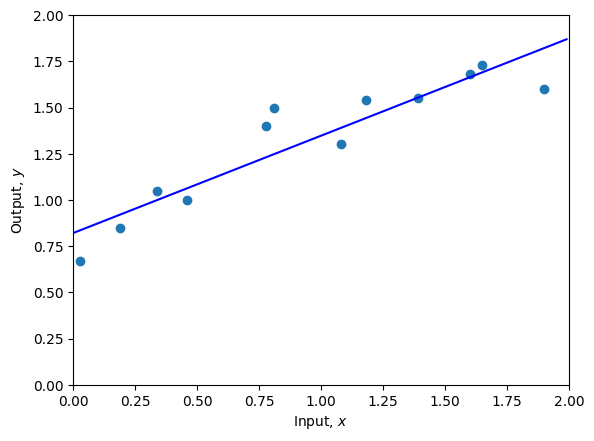

In [11]:
for epoch in range(epochs):
    # calc loss
    l = loss(x,y,phi0,phi1)

    # output loss every n epochs
    n = 10
    if epoch % n == 0:
        print(f"Epoch {epoch}: Loss = {l:.3f}, phi0 = {phi0:.3f}, phi1 = {phi1:.3f}")
        
    # calc gradients
    dphi0, dphi1 = grad(x,y,phi0,phi1)

    # update parameter weights
    phi1 -= lr * dphi1
    phi0 -= lr * dphi0

# Plot the data and the updated model predictions
plot(x,y,phi0,phi1)

Plot the trained model against the training data.

## Training Animation

We can run the training again and create a video of the individual plot frames.

In [12]:
# Set initial values
lr = 0.001
epochs = 200
phi0 = 0.2; phi1 = -0.8

Epoch 0: Loss = 50.034, phi0 = 0.245, phi1 = -0.746
Epoch 10: Loss = 18.235, phi0 = 0.587, phi1 = -0.332
Epoch 20: Loss = 6.828, phi0 = 0.788, phi1 = -0.081
Epoch 30: Loss = 2.729, phi0 = 0.903, phi1 = 0.073
Epoch 40: Loss = 1.249, phi0 = 0.969, phi1 = 0.169
Epoch 50: Loss = 0.707, phi0 = 1.004, phi1 = 0.230
Epoch 60: Loss = 0.503, phi0 = 1.022, phi1 = 0.269
Epoch 70: Loss = 0.421, phi0 = 1.029, phi1 = 0.296
Epoch 80: Loss = 0.383, phi0 = 1.029, phi1 = 0.315
Epoch 90: Loss = 0.361, phi0 = 1.027, phi1 = 0.329
Epoch 100: Loss = 0.346, phi0 = 1.022, phi1 = 0.340
Epoch 110: Loss = 0.334, phi0 = 1.016, phi1 = 0.349
Epoch 120: Loss = 0.323, phi0 = 1.010, phi1 = 0.357
Epoch 130: Loss = 0.313, phi0 = 1.003, phi1 = 0.364
Epoch 140: Loss = 0.305, phi0 = 0.997, phi1 = 0.371
Epoch 150: Loss = 0.297, phi0 = 0.990, phi1 = 0.377
Epoch 160: Loss = 0.289, phi0 = 0.984, phi1 = 0.383
Epoch 170: Loss = 0.282, phi0 = 0.978, phi1 = 0.389
Epoch 180: Loss = 0.276, phi0 = 0.972, phi1 = 0.394
Epoch 190: Loss = 

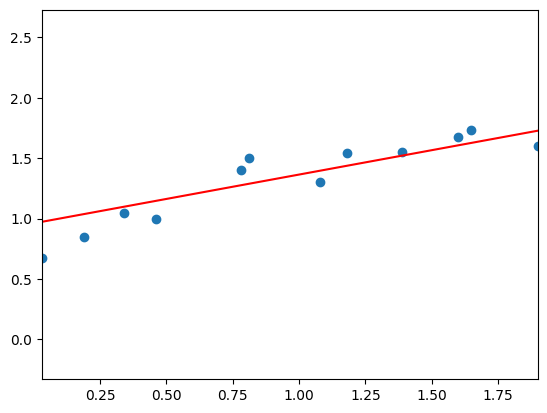

In [13]:
# Create a directory to save the frames
frame_dir = 'Ch1/frames'
if not os.path.exists(frame_dir):
    os.makedirs(frame_dir)

# Create the figure and axis
fig, ax = plt.subplots()

# Scatter plot of the data points
sc = ax.scatter(x, y)

# Line plot for the model's prediction
(line,) = ax.plot(x, phi0 + phi1 * x, color='red')

# Set axis limits for better visualization
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y) - 1, max(y) + 1)

# Function to save each frame
def save_frame(epoch):
    global phi0, phi1

    # Calculate the loss and gradients
    l = loss(x, y, phi0, phi1)
    dphi0, dphi1 = grad(x, y, phi0, phi1)

    # Update the weights
    phi1 -= lr * dphi1
    phi0 -= lr * dphi0

    # Update the line with new model predictions
    line.set_ydata(phi0 + phi1 * x)

    # Optionally, print the loss and parameters
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {l:.3f}, phi0 = {phi0:.3f}, phi1 = {phi1:.3f}")
    
    # Save the current figure as a frame
    plt.savefig(f'{frame_dir}/frame_{epoch:04d}.png')

# Run the training loop and save each frame
for epoch in range(epochs):
    save_frame(epoch)

# Once the frames are saved, combine them into a video using ffmpeg (if installed).
# For example, you can run this command in your terminal:
# !ffmpeg -framerate 30 -i frames/frame_%04d.png -pix_fmt yuv420p output_video.mp4

In [14]:
# Combine the frames into a video using ffmpeg
! ffmpeg -v 1 -y -framerate 30 -i Ch1/frames/frame_%04d.png -pix_fmt yuv420p Ch1/output_video.mp4

# Display the video in the notebook
Video("Ch1/output_video.mp4", embed=True)

# Problem 2.2

The gradients of the loss function with respect to $\large \phi_0$ and $\large \phi_1$, and setting equal to `0`, are:

$\large \frac{\partial L}{\partial \phi_0} = 2 \sum\limits_{i=1}^I \left(\phi_0 + \phi_1 x_i - y_i\right) = 0$

$\large \frac{\partial L}{\partial \phi_1} = 2 \sum\limits_{i=1}^I \left(\phi_0 + \phi_1 x_i - y_i\right) x_i = 0$

Solving for $\large \phi_0$ and $\large \phi_1$ respectively and using substitution gives:

$\large \phi_1 = \frac{I \sum_{i=1}^I y_i x_i - \left( \sum_{i=1}^I y_i \right) \sum_{i=1}^I x_i}{I \sum_{i=1}^I x_i^2 - \left( \sum_{i=1}^I x_i \right)^2}$

$\large \phi_0 = \frac{1}{I} \left( \sum_{i=1}^I y_i - \phi_1 \sum_{i=1}^I x_i \right)$

Let's write these equations in Python code and verify the closed form solution matches the gradient descent solution from above. The `cf` suffix stands for closed form.

In [23]:
I = len(x)
phi1_cf = ((I * np.sum(x * y)) - (np.sum(y) * np.sum(x))) / ((I * np.sum(x**2)) - np.sum(x)**2) 
phi0_cf = 1/I * (np.sum(y) - phi1_cf * np.sum(x)) 
print(f'phi0 ={ phi0_cf:.3f}, phi1 = {phi1_cf:.3f}')

phi0 =0.826, phi1 = 0.522


These match the values from the training loop, where we used gradient descent to iteratively calculate the values for phi0 and phi1!